In [2]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as st

import requests
import json
from pprint import pprint


In [3]:
ACrash = Path("Data/cleaned_crash_data.csv")

In [4]:
Acrash_df = pd.read_csv(ACrash)
Acrash_df.tail()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Speed Limit,Road User,Gender,Age,National Remoteness Areas,Age Group,Time of day
6761,20144083,SA,1,2014,Friday,11:10,Multiple,110,Passenger,Male,40,Outer Regional Australia,40_to_64,Day
6762,20145108,WA,1,2014,Wednesday,11:47,Single,100,Motorcycle rider,Male,46,Major Cities of Australia,40_to_64,Day
6763,20144022,SA,1,2014,Monday,9:35,Single,50,Pedestrian,Female,82,Major Cities of Australia,75_or_older,Day
6764,20145072,WA,1,2014,Tuesday,21:30,Single,110,Driver,Male,84,Remote Australia,75_or_older,Night
6765,20144007,SA,1,2014,Tuesday,20:00,Single,50,Pedestrian,Male,82,Major Cities of Australia,75_or_older,Night


In [5]:
AuCrash_df = Acrash_df [['Crash ID', 'State', 'Month', 'Year', 'Dayweek', 'Time','Crash Type', 'Speed Limit','Road User','Gender','Age','National Remoteness Areas','Age Group','Time of day',]]
AuCrash_df.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Speed Limit,Road User,Gender,Age,National Remoteness Areas,Age Group,Time of day
0,20214022,SA,9,2021,Saturday,23:31,Multiple,110,Pedestrian,Female,28,Major Cities of Australia,26_to_39,Night
1,20213034,Qld,9,2021,Saturday,4:00,Multiple,100,Motorcycle rider,Male,19,Major Cities of Australia,17_to_25,Night
2,20213092,Qld,9,2021,Saturday,2:00,Single,60,Driver,Male,47,Major Cities of Australia,40_to_64,Night
3,20214053,SA,9,2021,Thursday,21:00,Single,80,Driver,Male,24,Inner Regional Australia,17_to_25,Night
4,20213178,Qld,9,2021,Sunday,21:00,Multiple,50,Motorcycle rider,Male,52,Major Cities of Australia,40_to_64,Night


In [6]:
AuCrash_df ['Month'].value_counts()

3     648
8     631
1     591
7     587
4     570
12    561
5     550
6     547
10    530
9     525
2     513
11    513
Name: Month, dtype: int64

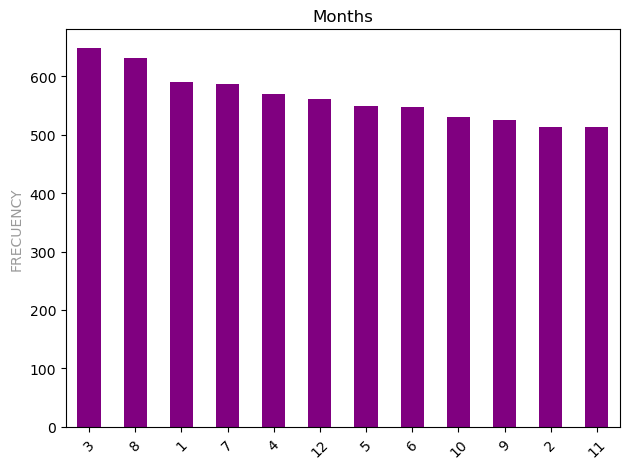

In [53]:
# Generate a bar plot showing the diference for each day using Pandas
AuCrash_df['Month']=AuCrash_df['Month'].astype(int)
Months_df = AuCrash_df ['Month'].value_counts()
# Months_df = Months_df.astype(int)
Months_df.plot(kind='bar', color='Purple', alpha=1,legend=False,rot=45);

plt.title('Months')
plt.ylabel('FRECUENCY', alpha=0.4)
#set(gca,'xtickLabels',{'Mar','Aug','Jan','Jul','Apr','Dec','May','Jun','Oct','Sep','Feb','Nov'})
plt.tight_layout()
plt.savefig('Data/Images/Months.png')


plt.show()

In [51]:
AuCrash_df ['Dayweek'].value_counts()

Saturday     1175
Sunday       1076
Friday       1035
Thursday      921
Monday        867
Wednesday     857
Tuesday       835
Name: Dayweek, dtype: int64

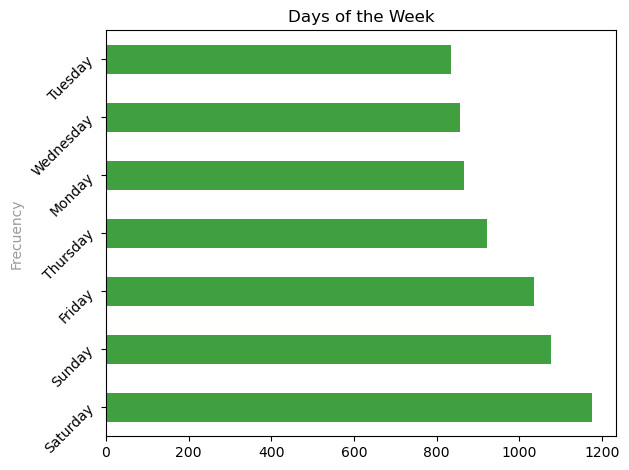

In [9]:
# Generate a bar plot showing the diference for each day using Pandas

DW_df=AuCrash_df ['Dayweek'].value_counts()
DW_df.plot(kind='barh', color='green', alpha=0.75,rot=45)

plt.title('Days of the Week')
plt.ylabel('Frecuency', alpha=0.4)
plt.tight_layout()
plt.savefig('Data/Images/Days.png')
plt.show()


In [10]:
# Get the count of day vs night
AuCrash_df ['Time of day'].value_counts()

Day      4175
Night    2591
Name: Time of day, dtype: int64

In [11]:
AuCrash_df ['Month'].value_counts()

3     648
8     631
1     591
7     587
4     570
12    561
5     550
6     547
10    530
9     525
2     513
11    513
Name: Month, dtype: int64

In [12]:
AuCrash_df.groupby ('National Remoteness Areas').count()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Speed Limit,Road User,Gender,Age,Age Group,Time of day
National Remoteness Areas,,,,,,,,,,,,,
Inner Regional Australia,2185,2185,2185,2185,2185,2185,2185,2185,2185,2185,2185,2185,2185
Major Cities of Australia,2324,2324,2324,2324,2324,2324,2324,2324,2324,2324,2324,2324,2324
Outer Regional Australia,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626
Remote Australia,301,301,301,301,301,301,301,301,301,301,301,301,301
Very Remote Australia,330,330,330,330,330,330,330,330,330,330,330,330,330


In [13]:
print(AuCrash_df.dtypes)

Crash ID                      int64
State                        object
Month                         int64
Year                          int64
Dayweek                      object
Time                         object
Crash Type                   object
Speed Limit                   int64
Road User                    object
Gender                       object
Age                           int64
National Remoteness Areas    object
Age Group                    object
Time of day                  object
dtype: object


In [14]:
AuCrash_df['Time']=AuCrash_df['Time'].str.replace(':','').astype(int)

In [15]:
print(AuCrash_df.dtypes)

Crash ID                      int64
State                        object
Month                         int64
Year                          int64
Dayweek                      object
Time                          int32
Crash Type                   object
Speed Limit                   int64
Road User                    object
Gender                       object
Age                           int64
National Remoteness Areas    object
Age Group                    object
Time of day                  object
dtype: object


In [16]:
AuCrash_df['Time Frame'] = pd.cut(AuCrash_df['Time'], bins=4, labels=('Dawn','Morning','Afternoon','Night') )

In [17]:
AuCrash_df.head(10)

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Speed Limit,Road User,Gender,Age,National Remoteness Areas,Age Group,Time of day,Time Frame
0,20214022,SA,9,2021,Saturday,2331,Multiple,110,Pedestrian,Female,28,Major Cities of Australia,26_to_39,Night,Night
1,20213034,Qld,9,2021,Saturday,400,Multiple,100,Motorcycle rider,Male,19,Major Cities of Australia,17_to_25,Night,Dawn
2,20213092,Qld,9,2021,Saturday,200,Single,60,Driver,Male,47,Major Cities of Australia,40_to_64,Night,Dawn
3,20214053,SA,9,2021,Thursday,2100,Single,80,Driver,Male,24,Inner Regional Australia,17_to_25,Night,Night
4,20213178,Qld,9,2021,Sunday,2100,Multiple,50,Motorcycle rider,Male,52,Major Cities of Australia,40_to_64,Night,Night
5,20211068,NSW,9,2021,Tuesday,2150,Single,60,Driver,Female,32,Inner Regional Australia,26_to_39,Night,Night
6,20211169,NSW,9,2021,Saturday,805,Single,110,Motorcycle rider,Male,26,Inner Regional Australia,26_to_39,Day,Morning
7,20213169,Qld,9,2021,Sunday,1300,Single,100,Driver,Male,52,Outer Regional Australia,40_to_64,Day,Afternoon
8,20211088,NSW,9,2021,Saturday,830,Single,100,Passenger,Female,11,Outer Regional Australia,0_to_16,Day,Morning
9,20211025,NSW,9,2021,Sunday,1052,Single,100,Driver,Male,46,Outer Regional Australia,40_to_64,Day,Morning


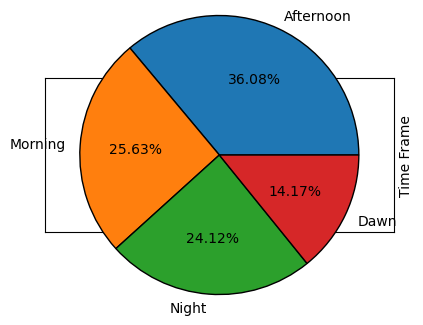

In [18]:
#Pie chart Time Frame
TDN_1_df=AuCrash_df ['Time Frame'].value_counts()

TDN_1_df.plot(kind="pie", autopct="%1.2f%%",secondary_y=True,figsize=(4.5,2),legend=False, wedgeprops={'edgecolor':'black'});
plt.savefig('Data/Images/Time Frame.png')
plt.xlabel(" Dawn(0-6), Morning(6-12),Afternoon(12-18), Night(18-23:59) ");


In [19]:
AuCrash_df.groupby ('Crash Type').count()

,Crash ID,State,Month,Year,Dayweek,Time,Speed Limit,Road User,Gender,Age,National Remoteness Areas,Age Group,Time of day,Time Frame
Crash Type,,,,,,,,,,,,,,
Multiple,2982,2982,2982,2982,2982,2982,2982,2982,2982,2982,2982,2982,2982,2982
Single,3784,3784,3784,3784,3784,3784,3784,3784,3784,3784,3784,3784,3784,3784


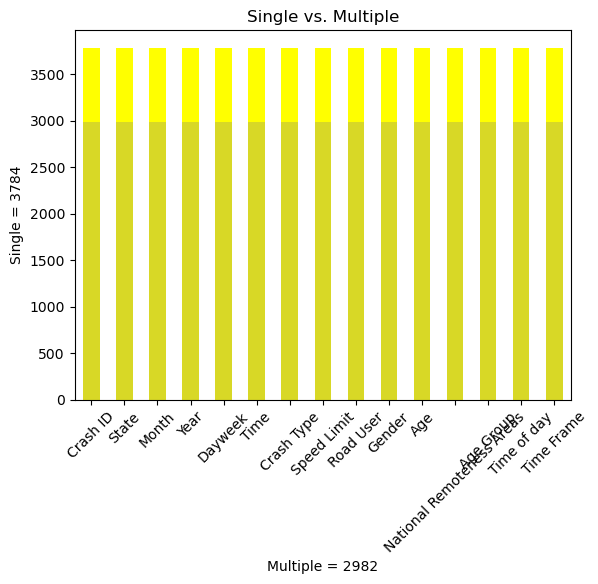

In [45]:
# Generate a line plot of Single vs. Multiple
AuCrash_M_df = AuCrash_df.loc[AuCrash_df['Crash Type']=='Multiple'].count() 
AuCrash_S_df = AuCrash_df.loc[AuCrash_df['Crash Type']=='Single'].count()  

AuCrash_S_df.plot(kind='bar', color='yellow', alpha=1,legend=False,rot=45);
AuCrash_M_df.plot(kind='bar', color='Grey', alpha=0.3,legend=False,rot=45);

plt.ylabel('Single = 3784')
plt.xlabel('Multiple = 2982')
plt.title('Single vs. Multiple')
plt.savefig('Data/Images/Single.png')
plt.show()

     